<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.207469,95.932431,-0.002775,202.137125,202.156057,-0.018932
1,0.0,1.0,79.042355,60.819782,-0.006598,149.855539,149.866729,-0.011190
2,0.0,2.0,74.360900,80.359205,-0.014516,164.705590,164.728483,-0.022893
3,0.0,3.0,21.851226,41.321105,-0.030760,73.141570,73.161626,-0.020056
4,0.0,4.0,20.744127,94.895263,0.007639,125.647028,125.641249,0.005779
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.494587,94.845130,-0.002980,135.336736,135.346736,-0.010000
19996,999.0,16.0,99.668564,28.379722,-0.041797,138.006489,138.029003,-0.022514
19997,999.0,17.0,66.363078,65.575855,0.021840,141.960774,141.934525,0.026248
19998,999.0,18.0,75.553005,46.706909,-0.006521,132.253393,132.247740,0.005653


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.207469,95.932431,-0.002775,202.137125,202.156057,-0.018932
1,0.0,1.0,79.042355,60.819782,-0.006598,149.855539,149.866729,-0.011190
2,0.0,2.0,74.360900,80.359205,-0.014516,164.705590,164.728483,-0.022893
3,0.0,3.0,21.851226,41.321105,-0.030760,73.141570,73.161626,-0.020056
4,0.0,4.0,20.744127,94.895263,0.007639,125.647028,125.641249,0.005779
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.494587,94.845130,-0.002980,135.336736,135.346736,-0.010000
19996,999.0,16.0,99.668564,28.379722,-0.041797,138.006489,138.029003,-0.022514
19997,999.0,17.0,66.363078,65.575855,0.021840,141.960774,141.934525,0.026248
19998,999.0,18.0,75.553005,46.706909,-0.006521,132.253393,132.247740,0.005653


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    96.207469  95.932431 -0.002775  202.137125  202.156057 -0.018932
      1.0    79.042355  60.819782 -0.006598  149.855539  149.866729 -0.011190
      2.0    74.360900  80.359205 -0.014516  164.705590  164.728483 -0.022893
      3.0    21.851226  41.321105 -0.030760   73.141570   73.161626 -0.020056
      4.0    20.744127  94.895263  0.007639  125.647028  125.641249  0.005779
...                ...        ...       ...         ...         ...       ...
999.0 15.0   30.494587  94.845130 -0.002980  135.336736  135.346736 -0.010000
      16.0   99.668564  28.379722 -0.041797  138.006489  138.029003 -0.022514
      17.0   66.363078  65.575855  0.021840  141.960774  141.934525  0.026248
      18.0   75.553005  46.706909 -0.006521  132.253393  132.247740  0.005653
      19.0   67.350206  97.225176 -0.004647  174.570735  174.584468 -0.013733

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    96.207469  95.932431 -0.002775  202.137125  202.156057 -0.018932
      1.0    79.042355  60.819782 -0.006598  149.855539  149.866729 -0.011190
      2.0    74.360900  80.359205 -0.014516  164.705590  164.728483 -0.022893
      3.0    21.851226  41.321105 -0.030760   73.141570   73.161626 -0.020056
      4.0    20.744127  94.895263  0.007639  125.647028  125.641249  0.005779
...                ...        ...       ...         ...         ...       ...
999.0 15.0   30.494587  94.845130 -0.002980  135.336736  135.346736 -0.010000
      16.0   99.668564  28.379722 -0.041797  138.006489  138.029003 -0.022514
      17.0   66.363078  65.575855  0.021840  141.960774  141.934525  0.026248
      18.0   75.553005  46.706909 -0.006521  132.253393  132.247740  0.005653
      19.0   67.350206  97.225176 -0.004647  174.570735  174.584468 -0.013733

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.207469,95.932431,-0.002775,202.137125,202.156057,-0.018932
1,0.0,1.0,79.042355,60.819782,-0.006598,149.855539,149.866729,-0.011190
2,0.0,2.0,74.360900,80.359205,-0.014516,164.705590,164.728483,-0.022893
3,0.0,3.0,21.851226,41.321105,-0.030760,73.141570,73.161626,-0.020056
4,0.0,4.0,20.744127,94.895263,0.007639,125.647028,125.641249,0.005779
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.494587,94.845130,-0.002980,135.336736,135.346736,-0.010000
19996,999.0,16.0,99.668564,28.379722,-0.041797,138.006489,138.029003,-0.022514
19997,999.0,17.0,66.363078,65.575855,0.021840,141.960774,141.934525,0.026248
19998,999.0,18.0,75.553005,46.706909,-0.006521,132.253393,132.247740,0.005653


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    96.207469  95.932431 -0.002775  202.137125  202.156057 -0.018932
      1.0    79.042355  60.819782 -0.006598  149.855539  149.866729 -0.011190
      2.0    74.360900  80.359205 -0.014516  164.705590  164.728483 -0.022893
      3.0    21.851226  41.321105 -0.030760   73.141570   73.161626 -0.020056
      4.0    20.744127  94.895263  0.007639  125.647028  125.641249  0.005779
...                ...        ...       ...         ...         ...       ...
999.0 15.0   30.494587  94.845130 -0.002980  135.336736  135.346736 -0.010000
      16.0   99.668564  28.379722 -0.041797  138.006489  138.029003 -0.022514
      17.0   66.363078  65.575855  0.021840  141.960774  141.934525  0.026248
      18.0   75.553005  46.706909 -0.006521  132.253393  132.247740  0.005653
      19.0   67.350206  97.225176 -0.004647  174.570735  174.584468 -0.013733

[20000 rows x 6 columns]

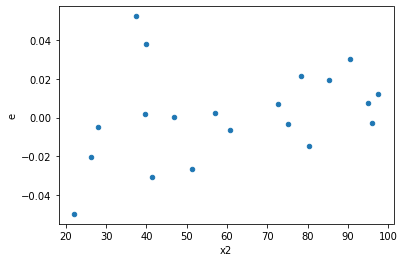

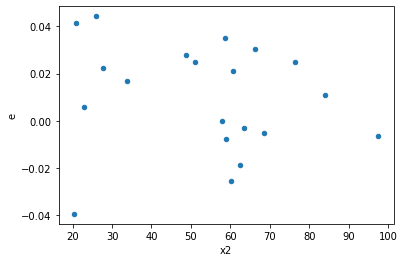

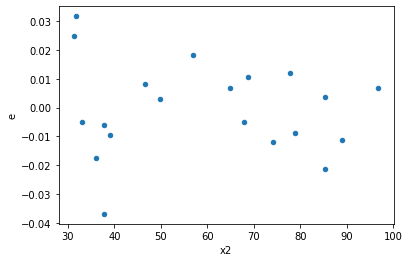

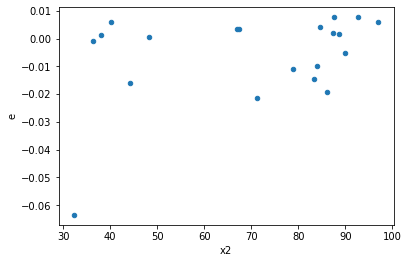

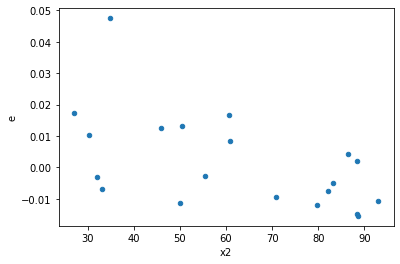

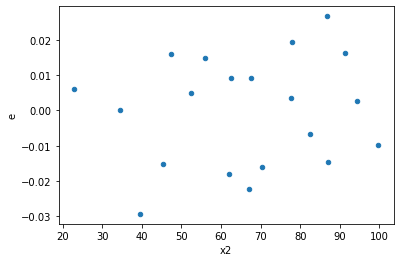

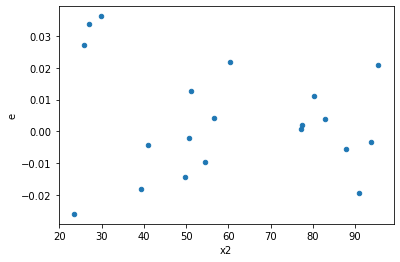

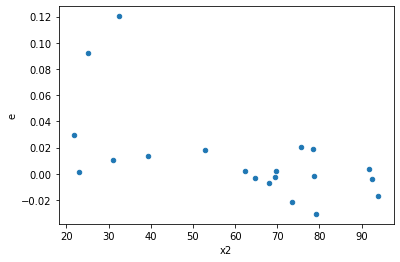

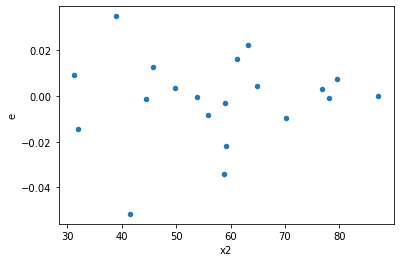

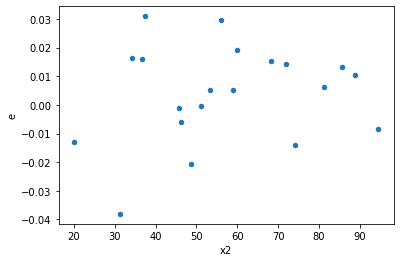

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,0.0014090605229729791,0.0014752687531480084,0.0002348434204954965,0.00024587812552466807,1.0469874991851567,0.9569754977379836,0.5215122511310082,0.4784877488689918,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,0.0014380809692689184,0.0015936874047701739,0.00023968016154481974,0.00026561456746169564,1.1082042241198433,0.9039339271429006,0.5480330364285497,0.4519669635714503,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,0.0015430426981714379,0.0018217920514258044,0.000257173783028573,0.0003036320085709674,1.1806491509176607,0.8453806044265035,0.5773096977867482,0.42269030221325177,Reject005=1 : Homoscedasticity
20.0,6.0,6.0,0.000264460891578331,0.0010563214121607318,4.407681526305517e-05,0.0001760535686934553,3.994244312860371,0.11619434298396358,0.9419028285080182,0.05809717149198179,Reject005=1 : Homoscedasticity
30.0,6.0,6.0,0.001549241445304696,0.0015905375103590811,0.00025820690755078265,0.00026508958505984685,1.0266556676362755,0.975341833354233,0.5123290833228835,0.4876709166771165,Reject005=1 : Homoscedasticity
47.0,6.0,6.0,0.003051374673348186,0.0031049162190970783,0.0005085624455580311,0.0005174860365161797,1.0175466966467746,0.9836938608185257,0.5081530695907371,0.49184693040926286,Reject005=1 : Homoscedasticity
49.0,6.0,6.0,0.0006226210486890148,0.0007339066693463073,0.00010377017478150247,0.00012231777822438455,1.1787373248810245,0.8468691618859363,0.5765654190570318,0.42343458094296815,Reject005=1 : Homoscedasticity
52.0,6.0,6.0,0.0017385646888809139,0.0020596767841428603,0.0002897607814801523,0.00034327946402381004,1.1846995382545362,0.8422368777669815,0.5788815611165092,0.42111843888349076,Reject005=1 : Homoscedasticity
61.0,6.0,6.0,0.001292969687861843,0.005256637035242144,0.00021549494797697382,0.0008761061725403573,4.065553187047204,0.11190310322116437,0.9440484483894178,0.055951551610582184,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.0014090605229729791,0.0014752687531480084,0.0002348434204954965,0.00024587812552466807,1.0469874991851567,0.9569754977379836,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,0.00458491223335552,0.0021805959191190443,0.0007641520388925867,0.0003634326531865074,0.4756025433278906,0.3876423098877997,Reject005=1 : Homoscedasticity
2.0,6.0,6.0,0.0014380809692689184,0.0015936874047701739,0.00023968016154481974,0.00026561456746169564,1.1082042241198433,0.9039339271429006,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,0.0031990985326868855,0.0001345327838378937,0.0005331830887811476,2.2422130639648953e-05,0.04205334173464836,0.0012362152086397172,Reject005=0 : Heteroscedasticity
4.0,6.0,6.0,0.0016718134168607448,0.000512288533305024,0.0002786355694767908,8.5381422217504e-05,0.3064268584869812,0.17579903363063656,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,0.0015430426981714379,0.0018217920514258044,0.000257173783028573,0.0003036320085709674,1.1806491509176607,0.8453806044265035,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,0.0014936726184929534,0.0008657671576851,0.0002489454364154922,0.00014429452628085,0.5796231027911719,0.5240749219227665,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,0.009446626428168537,0.0019180902200039102,0.0015744377380280895,0.000319681703333985,0.2030449954371467,0.07345363711642944,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,0.004299162761033335,0.0014258398188917757,0.0007165271268388891,0.00023763996981529596,0.33165523106388856,0.20504265986883968,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      690
Reject005=0 : Heteroscedasticity    310
Name: Result_test, dtype: int64